In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('credit_risk_dataset.csv')
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
print(data.loan_intent.unique())
print(data.person_home_ownership.unique())
print(data.loan_grade.unique())
print(data.cb_person_default_on_file.unique())

['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
['D' 'B' 'C' 'A' 'E' 'F' 'G']
['Y' 'N']


In [7]:
loan_intent_dict = {'PERSONAL':0, 'EDUCATION':1, 'MEDICAL':2, 'VENTURE':3, 'HOMEIMPROVEMENT':4, 'DEBTCONSOLIDATION':5}
data.loan_intent = data.loan_intent.map(lambda x: loan_intent_dict.get(x))
home_ownership_dict = {'RENT':0 , 'OWN':1, 'MORTGAGE':2, 'OTHER':3}
data.person_home_ownership = data.person_home_ownership.map(lambda x: home_ownership_dict.get(x))
loan_grade_dict = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6}
data.loan_grade = data.loan_grade.map(lambda x: loan_grade_dict.get(x))
data.cb_person_default_on_file = data.cb_person_default_on_file.map(lambda x: 0 if x == 'N' else 1)

In [8]:
data = data.drop(['loan_int_rate','person_emp_length'],1)
data

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,0,3,35000,1,0.59,1,3
1,21,9600,1,1,1,1000,0,0.10,0,2
2,25,9600,2,2,2,5500,1,0.57,0,3
3,23,65500,0,2,2,35000,1,0.53,0,2
4,24,54400,0,2,2,35000,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,0,2,5800,0,0.11,0,30
32577,54,120000,2,0,0,17625,0,0.15,0,19
32578,65,76000,0,4,1,35000,1,0.46,0,28
32579,56,150000,2,0,1,15000,0,0.10,0,26


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

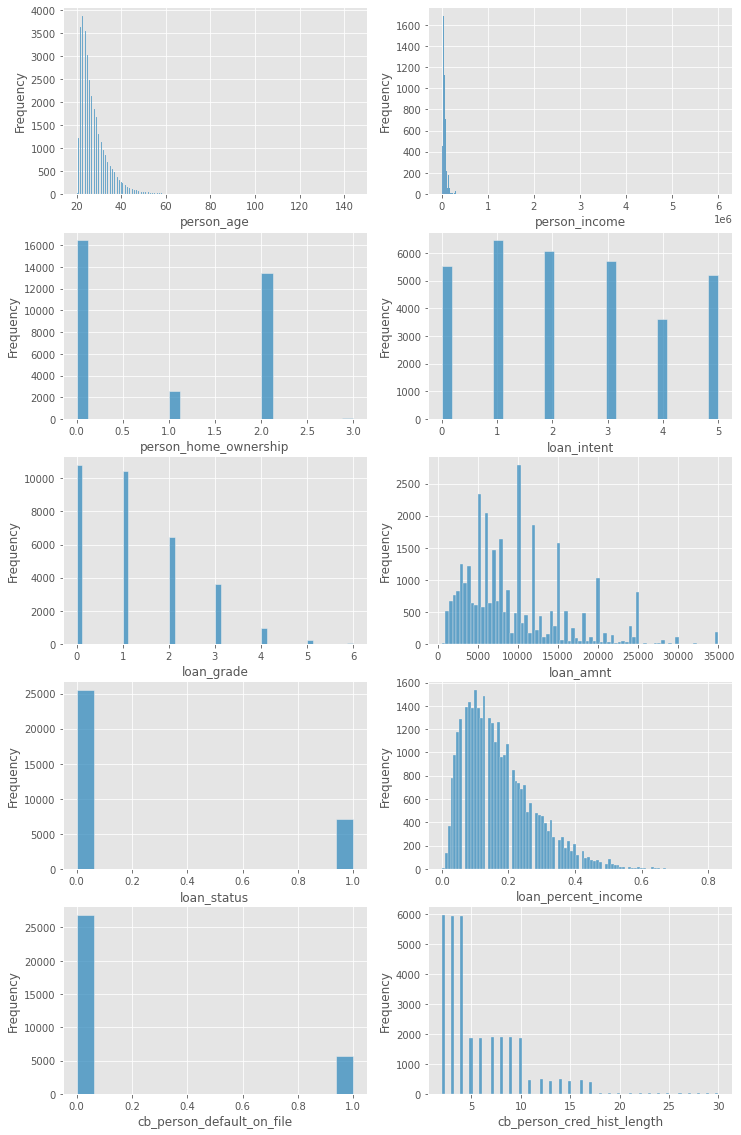

In [26]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(12,20))
    columns = data.columns
    i = 0
    for col in ax:
        for row in col:
            sns.histplot(data[columns[i]],ax=row)
            #row.title.set_text(columns[i])
            row.set_ylabel('Frequency')
            i +=1

In [30]:
default_loans = data.loc[data.loan_status == 1]
default_loans

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,0,3,35000,1,0.59,1,3
2,25,9600,2,2,2,5500,1,0.57,0,3
3,23,65500,0,2,2,35000,1,0.53,0,2
4,24,54400,0,2,2,35000,1,0.55,1,4
5,21,9900,1,3,0,2500,1,0.25,0,2
...,...,...,...,...,...,...,...,...,...,...
32563,52,71520,0,1,4,7000,1,0.10,1,24
32565,57,40000,0,2,0,15000,1,0.38,0,21
32571,60,45600,0,3,1,20000,1,0.44,0,26
32574,52,65004,0,0,3,20000,1,0.31,1,19


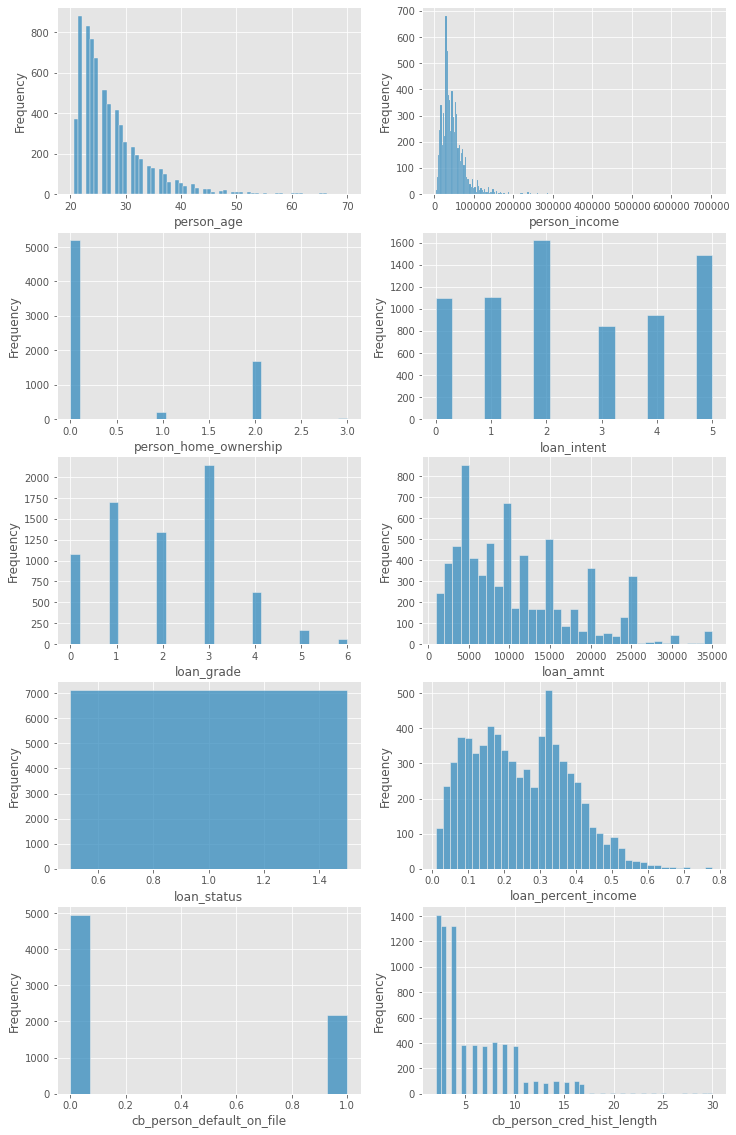

In [32]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(12,20))
    columns = default_loans.columns
    i = 0
    for col in ax:
        for row in col:
            sns.histplot(default_loans[columns[i]],ax=row)
            row.set_ylabel('Frequency')
            i +=1

In [33]:
non_default_loans = data.loc[data.loan_status == 0]
non_default_loans

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,1,1,1,1000,0,0.10,0,2
14,23,115000,0,1,0,35000,0,0.30,0,4
15,23,500000,2,5,1,30000,0,0.06,0,3
16,23,120000,0,1,0,35000,0,0.29,0,4
20,25,162500,0,3,0,35000,0,0.22,0,4
...,...,...,...,...,...,...,...,...,...,...
32575,52,64500,0,1,1,5000,0,0.08,0,20
32576,57,53000,2,0,2,5800,0,0.11,0,30
32577,54,120000,2,0,0,17625,0,0.15,0,19
32579,56,150000,2,0,1,15000,0,0.10,0,26


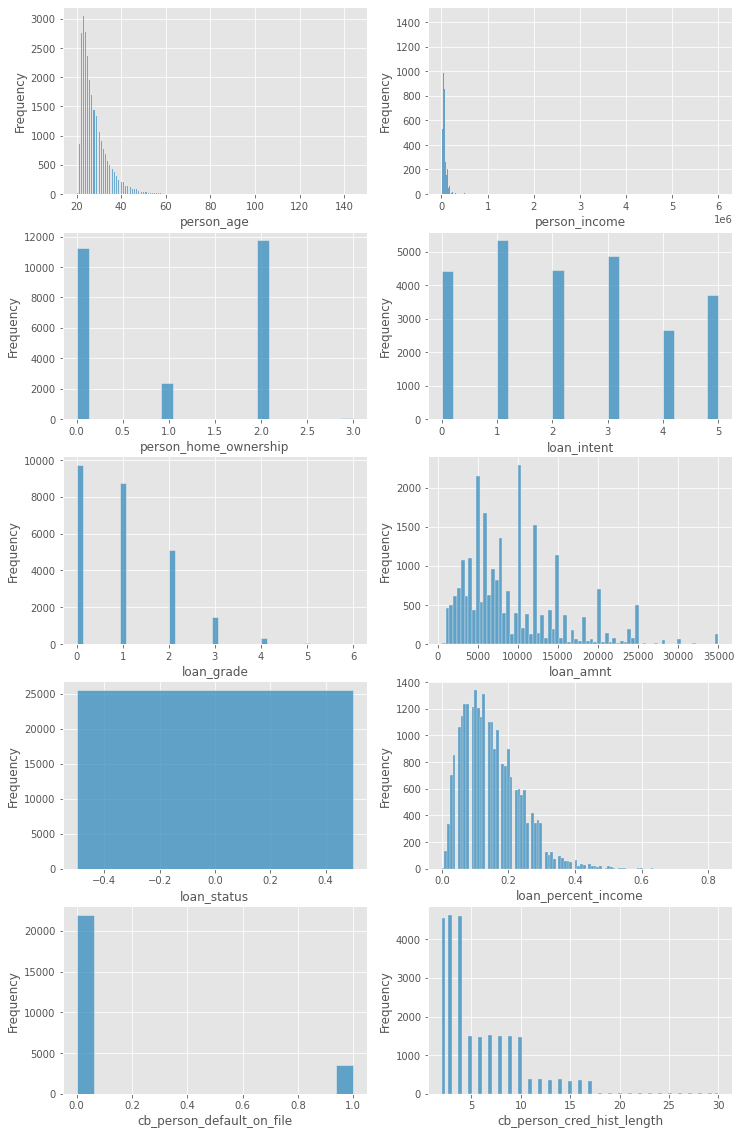

In [34]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(12,20))
    columns = non_default_loans.columns
    i = 0
    for col in ax:
        for row in col:
            sns.histplot(non_default_loans[columns[i]],ax=row)
            row.set_ylabel('Frequency')
            i +=1

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
random_forest = RandomForestClassifier()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('loan_status',1), data.loan_status, test_size=0.2, random_state=42)

In [42]:
model = random_forest.fit(X_train, y_train)
feature_importance = model.feature_importances_

In [51]:
important_features_dict = {}
for x,i in zip(X_train.columns,feature_importance):
    important_features_dict[x]=i
important_features_dict = {k: v for k, v in sorted(important_features_dict.items(), key=lambda item: item[1], reverse=True)}

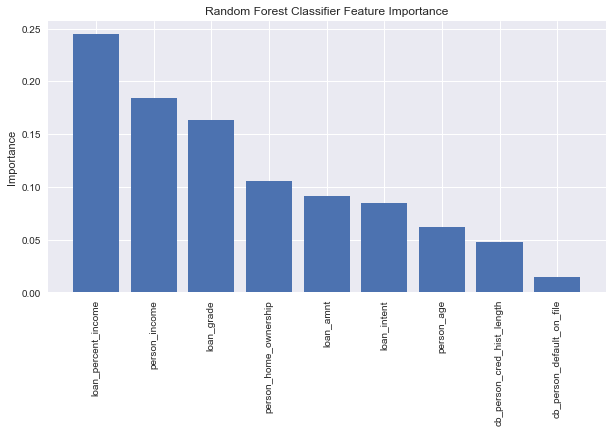

In [52]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(10,5))
    plt.bar(list(important_features_dict.keys()),list(important_features_dict.values()))
    plt.xticks(rotation=90)
    plt.ylabel('Importance')
    plt.title('Random Forest Classifier Feature Importance')
    plt.show()

In [53]:
predictions = model.predict(X_test)

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5072
           1       0.92      0.71      0.80      1445

    accuracy                           0.92      6517
   macro avg       0.92      0.85      0.88      6517
weighted avg       0.92      0.92      0.92      6517

